## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

Create 1 slide with informative visualization for each question. Explore data using SQL and Python but use Tableau for final visualization.

Don't limit your EDA to these 10 questions. Let's be creative :).

In [641]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import datetime
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [642]:
fuel_cons=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/fuel_cons.csv')
passengers=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/passsengers.csv')
miniflights=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/miniflights.csv')

In [643]:
airports=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/mid-term_project/airports.csv')

In [644]:
#remove index col
miniflights.drop(miniflights.columns[miniflights.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [650]:
flights

KeyboardInterrupt: 

In [645]:
total = miniflights.isnull().sum().sort_values(ascending=False)
percent = (miniflights.isnull().sum()/miniflights.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
distance,0,0.0
air_time,0,0.0
mkt_unique_carrier,0,0.0
mkt_carrier_fl_num,0,0.0
op_unique_carrier,0,0.0
tail_num,0,0.0
op_carrier_fl_num,0,0.0
origin_airport_id,0,0.0
origin,0,0.0
dest_airport_id,0,0.0


In [646]:
miniflights['arr_time']

0         1008.0
1          959.0
2         2044.0
3         1743.0
4         1113.0
           ...  
499995    2138.0
499996    1304.0
499997    1624.0
499998     113.0
499999    1426.0
Name: arr_time, Length: 500000, dtype: float64

In [647]:
#convert flight date to pandas datetime for easier functionality with actual time 
miniflights.fl_date = pd.to_datetime(miniflights.fl_date)



In [648]:
def format_time(hour):
    if pd.isnull(hour):
        return np.nan
    else:
        if hour == 2400: hour = 0
        hour = "{0:04d}".format(int(hour))
        time = datetime.time(int(hour[0:2]), int(hour[2:4]))
        return time
#_____________________________________________________________________
# creates datetime.datetime
def combine_date_time(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    listtime = []
    for index, cols in miniflights[['fl_date', col]].iterrows():    
        if pd.isnull(cols[1]):
            listtime.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_time(cols[1])
            listtime.append(combine_date_time(cols))
    return pd.Series(listtime)

In [649]:
miniflights['crs_dep_time'] = miniflights['crs_dep_time'].apply(format_time)
miniflights['dep_time'] = miniflights['dep_time'].apply(format_time)
miniflights['crs_arr_time'] = miniflights['crs_arr_time'].apply(format_time)
miniflights['arr_time'] = miniflights['arr_time'].apply(format_time)
#__________________________________________________________________________
miniflights.loc[:5, ['crs_dep_time', 'crs_arr_time', 'dep_time',
             'arr_time', 'dep_delay', 'arr_delay']]

,crs_dep_time,crs_arr_time,dep_time,arr_time,dep_delay,arr_delay
0,08:33:00,10:14:00,08:32:00,10:08:00,-1.0,-6.0
1,09:20:00,10:19:00,09:15:00,09:59:00,-5.0,-20.0
2,20:35:00,21:00:00,20:29:00,20:44:00,-6.0,-16.0
3,16:10:00,17:54:00,16:02:00,17:43:00,-8.0,-11.0
4,09:14:00,11:28:00,09:10:00,11:13:00,-4.0,-15.0
5,22:30:00,23:59:00,22:57:00,00:34:00,27.0,35.0


In [653]:
flights.crs_dep_time.dtype

dtype('int64')

In [652]:
values = miniflights['crs_dep_time'].fillna('00:00').str.split(':', expand=True).astype(int)
factors = np.array([60, 1])

miniflights['crs_dep_time'] = (values * factors).sum(1)

AttributeError: Can only use .str accessor with string values!

In [166]:
airline_names=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/datasets_810_1496_airlines.csv')

In [191]:
abbr_companies = airline_names.set_index('IATA_CODE')['AIRLINE'].to_dict()
abbr_companies#G4 was not in the csv, but it is allegiant airlines 
abbr_companies['G4']='Allegiant Air'


In [192]:
abbr_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America',
 'G4': 'Allegiant Air'}

In [183]:
# gets stats:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
#create stats on each airlines min max and number of delays 
global_stats = miniflights['dep_delay'].groupby(miniflights['mkt_unique_carrier']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
mkt_unique_carrier,,,,
VX,-19.0,520.0,543.0,4.968692
HA,-28.0,380.0,5746.0,1.034633
G4,-35.0,1365.0,6333.0,12.252803
F9,-34.0,621.0,7842.0,17.645499
NK,-24.0,1138.0,11815.0,10.450698
B6,-27.0,1594.0,18718.0,17.600224
AS,-45.0,892.0,26484.0,3.976288
WN,-49.0,515.0,83678.0,10.723117
UA,-49.0,1591.0,95453.0,12.864708


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


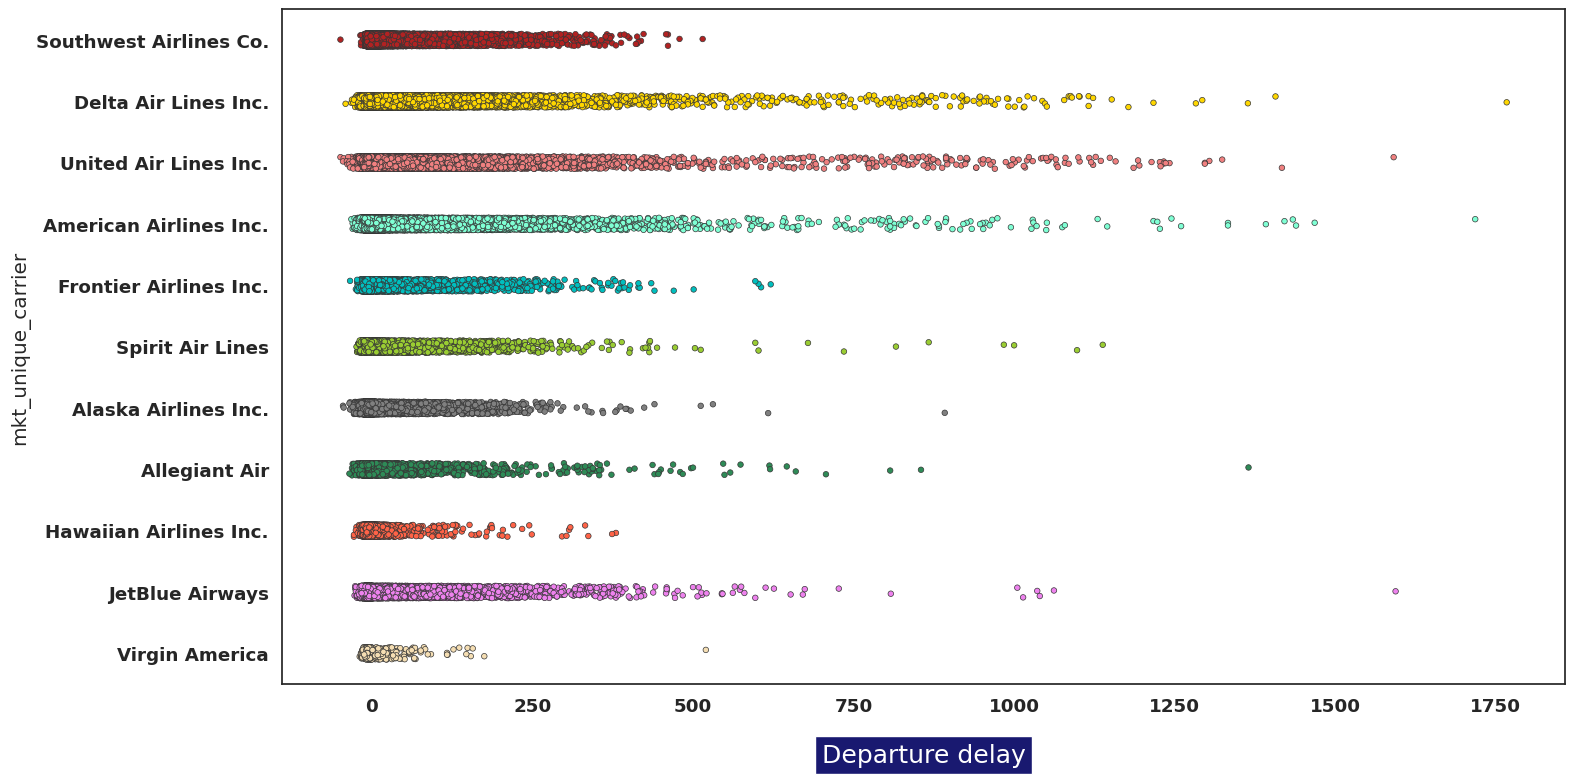

In [634]:
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# airline col labeling here  
df2 = miniflights.loc[:, ['mkt_unique_carrier', 'dep_delay']]
df2['mkt_unique_carrier'] = df2['mkt_unique_carrier'].replace(abbr_companies)#some companies are not in 
#csv i found and therefore do not appear as the full name on the graph 

#___________________________________
fig = plt.figure(1, figsize=(16,15))
 
ax1=fig.add_subplot(gs[1,:]) 

#------------------------------------------------------
# striplot with all the values reported for the delays


colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax1 = sns.stripplot(y="mkt_unique_carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 
plt.savefig('airlineplot.png', dpi=300, bbox_inches='tight')

In [266]:
miniflights.mkt_unique_carrier.count()

500000

In [ ]:
stats.ttest_ind(rvs1, rvs5)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [ ]:
#before removing outliers
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(miniflights.dep_delay, ax=ax)

In [278]:
# # -----> Delayed Removing Outliers (Highest Negative Correlated with Labels)
delayed = miniflights['dep_delay'].values
q25, q75 = np.nanpercentile(delayed, 25), np.nanpercentile(delayed, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
delayed_iqr = q75 - q25
print('iqr: {}'.format(delayed_iqr))

delayed_cut_off = delayed_iqr * 1.5
delayed_lower, delayed_upper = q25 - delayed_cut_off, q75 + delayed_cut_off
print('Cut Off: {}'.format(delayed_cut_off))
print('V14 Lower: {}'.format(delayed_lower))
print('V14 Upper: {}'.format(delayed_upper))

outliers = [x for x in delayed if x < delayed_lower or x > delayed_upper]
print('Feature delayed Outliers : {}'.format(len(outliers)))
print('delayed outliers:{}'.format(outliers))

miniflights = miniflights.drop(miniflights[(miniflights['dep_delay'] > delayed_upper) | (miniflights['dep_delay'] < delayed_lower)].index)
print('----' * 44)

Quartile 25: -6.0 | Quartile 75: 7.0
iqr: 13.0
Cut Off: 19.5
V14 Lower: -25.5
V14 Upper: 26.5
Feature delayed Outliers : 65612
delayed outliers:[182.0, 264.0, 34.0, 75.0, 29.0, 398.0, 50.0, 146.0, 41.0, 55.0, 78.0, 85.0, 138.0, 239.0, 35.0, 46.0, 28.0, 85.0, 171.0, 107.0, 144.0, 57.0, 80.0, 42.0, 71.0, 49.0, 612.0, 59.0, 85.0, 104.0, 57.0, 81.0, 53.0, 47.0, 47.0, 28.0, 772.0, 36.0, 64.0, 107.0, 187.0, 68.0, 32.0, 47.0, 148.0, 30.0, 44.0, 53.0, 119.0, 54.0, 91.0, 88.0, 64.0, 31.0, 97.0, 34.0, 61.0, 210.0, 76.0, 29.0, 37.0, 62.0, 105.0, 47.0, 27.0, 41.0, 29.0, 70.0, 27.0, 177.0, 156.0, 38.0, 135.0, 32.0, 283.0, 51.0, 87.0, 27.0, 42.0, 73.0, 44.0, 94.0, 79.0, 67.0, 47.0, 54.0, 32.0, 217.0, 27.0, 87.0, 32.0, 58.0, 55.0, 40.0, 227.0, 127.0, 99.0, 41.0, 28.0, 27.0, 379.0, 42.0, 104.0, 124.0, 135.0, 46.0, 36.0, 34.0, 85.0, 104.0, 122.0, 34.0, 134.0, 114.0, 37.0, 74.0, 57.0, 28.0, 27.0, 57.0, 33.0, 140.0, 83.0, 27.0, 33.0, 29.0, 28.0, 86.0, 27.0, 90.0, 33.0, 92.0, 34.0, 680.0, 123.0, 40.0, 47.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<AxesSubplot:xlabel='dep_delay'>

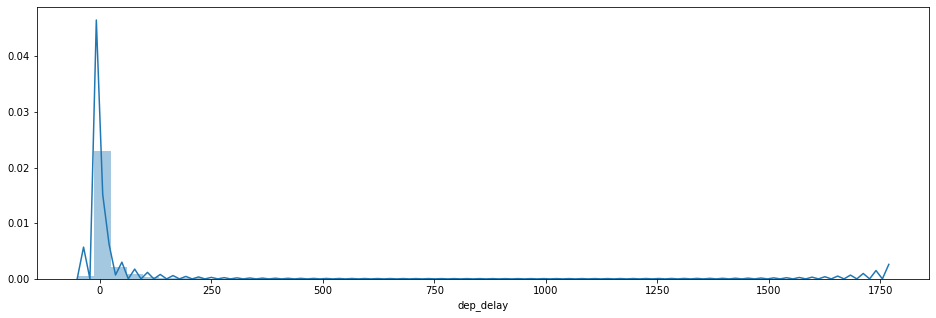

<AxesSubplot:xlabel='dep_delay'>

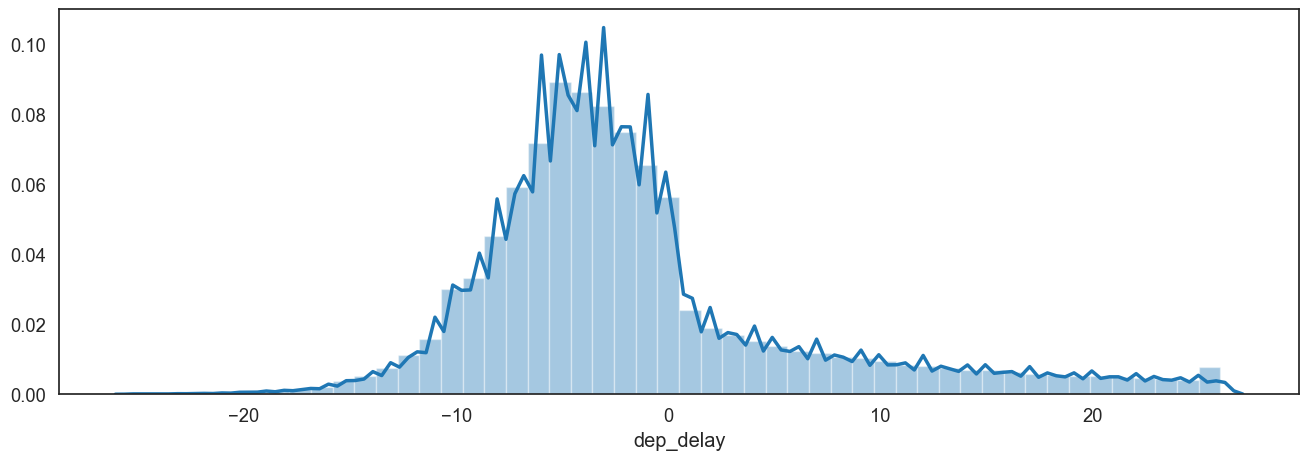

In [279]:
#after removing outliers 
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(miniflights.dep_delay, ax=ax)

<AxesSubplot:xlabel='arr_delay'>

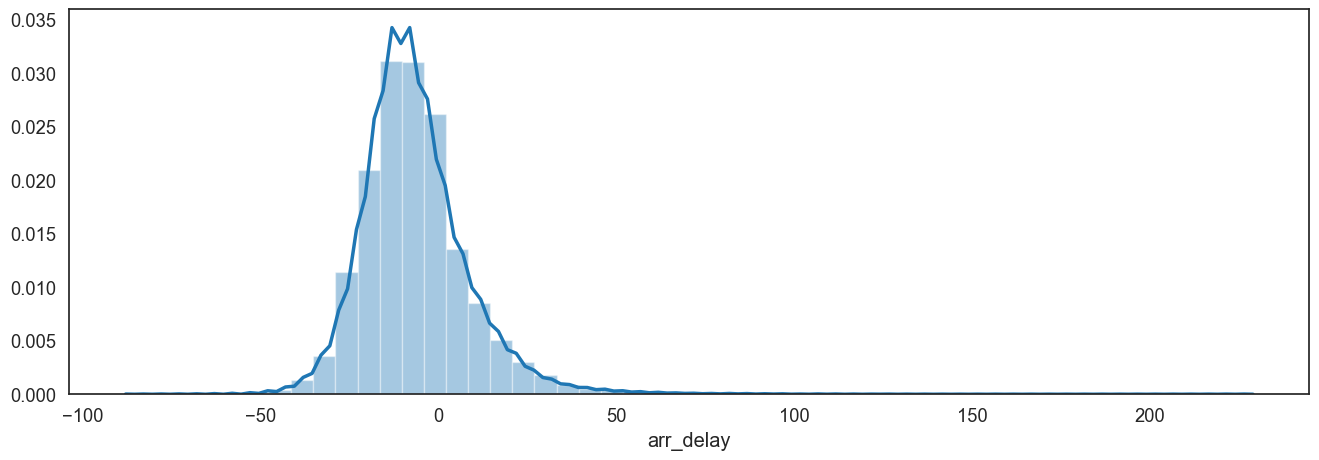

In [280]:
#before removing outliers 
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(miniflights.arr_delay, ax=ax)

In [685]:
# # -----> Delayed Removing Outliers (Highest Negative Correlated with Labels)
arrdelayed = miniflights['arr_delay'].values
q25, q75 = np.nanpercentile(arrdelayed, 25), np.nanpercentile(arrdelayed, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
arrdelayed_iqr = q75 - q25
print('iqr: {}'.format(arrdelayed_iqr))

arrdelayed_cut_off = arrdelayed_iqr * 1.5
arrdelayed_lower, arrdelayed_upper = q25 - arrdelayed_cut_off, q75 + arrdelayed_cut_off
print('Cut Off: {}'.format(arrdelayed_cut_off))
print('V14 Lower: {}'.format(arrdelayed_lower))
print('V14 Upper: {}'.format(arrdelayed_upper))

outliers = [x for x in delayed if x < arrdelayed_lower or x > arrdelayed_upper]
print('Feature delayed Outliers : {}'.format(len(outliers)))
print('delayed outliers:{}'.format(outliers))

miniflights = miniflights.drop(miniflights[(miniflights['arr_delay'] > arrdelayed_upper) | (miniflights['arr_delay'] < arrdelayed_lower)].index)
print('----' * 44)

Quartile 25: -15.0 | Quartile 75: 8.0
iqr: 23.0
Cut Off: 34.5
V14 Lower: -49.5
V14 Upper: 42.5
Feature delayed Outliers : 45842
delayed outliers:[182.0, 264.0, 75.0, 398.0, 50.0, 146.0, 55.0, 78.0, 85.0, 138.0, 239.0, 46.0, 85.0, 171.0, 107.0, 144.0, 57.0, 80.0, 71.0, 49.0, 612.0, 59.0, 85.0, 104.0, 57.0, 81.0, 53.0, 47.0, 47.0, 772.0, 64.0, 107.0, 187.0, 68.0, 47.0, 148.0, 44.0, 53.0, 119.0, 54.0, 91.0, 88.0, 64.0, 97.0, 61.0, 210.0, 76.0, 62.0, 105.0, 47.0, 70.0, 177.0, 156.0, 135.0, 283.0, 51.0, 87.0, 73.0, 44.0, 94.0, 79.0, 67.0, 47.0, 54.0, 217.0, 87.0, 58.0, 55.0, 227.0, 127.0, 99.0, 379.0, 104.0, 124.0, 135.0, 46.0, 85.0, 104.0, 122.0, 134.0, 114.0, 74.0, 57.0, 57.0, 140.0, 83.0, 86.0, 90.0, 92.0, 680.0, 123.0, 47.0, 160.0, 48.0, 69.0, 84.0, 44.0, 221.0, 52.0, 97.0, 101.0, 43.0, 97.0, 65.0, 64.0, 57.0, 80.0, 59.0, 50.0, 47.0, 139.0, 49.0, 55.0, 67.0, 75.0, 86.0, 53.0, 44.0, 71.0, 121.0, 177.0, 51.0, 83.0, 177.0, 70.0, 49.0, 66.0, 68.0, 69.0, 62.0, 127.0, 134.0, 66.0, 65.0, 64.0,

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Distribution of arrival delays')

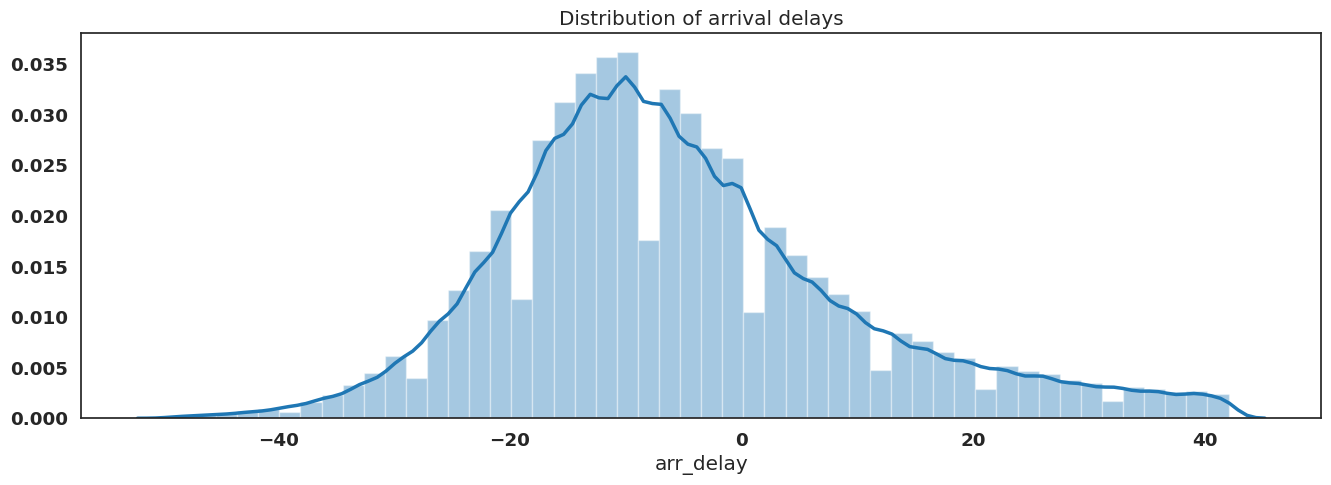

In [686]:
#after removing outliers 
fig, ax = plt.subplots(figsize=(16, 5))
plot=sns.distplot(miniflights.arr_delay, ax=ax)
plt.title('Distribution of arrival delays')


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [257]:
#none of this will be used its all tableau so i abbandoned it but still worth having here

In [258]:
miniflights.mkt_unique_carrier.unique()

array(['WN', 'DL', 'UA', 'AA', 'F9', 'NK', 'AS', 'G4', 'HA', 'B6', 'VX'],
      dtype=object)

In [267]:
#took much longer then was worth 

class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])   

In [260]:
carrier = 'WN'#futher its carrier dependent 
id_airport = 3
liste_origin_airport = miniflights[miniflights['mkt_unique_carrier'] == carrier]['origin'].unique()
df2 = miniflights[(miniflights['mkt_unique_carrier'] == carrier) & (miniflights['arr_delay'] > 0)
         & (miniflights['origin'] == liste_origin_airport[id_airport])]
df2.sort_values('crs_dep_time', inplace = True)

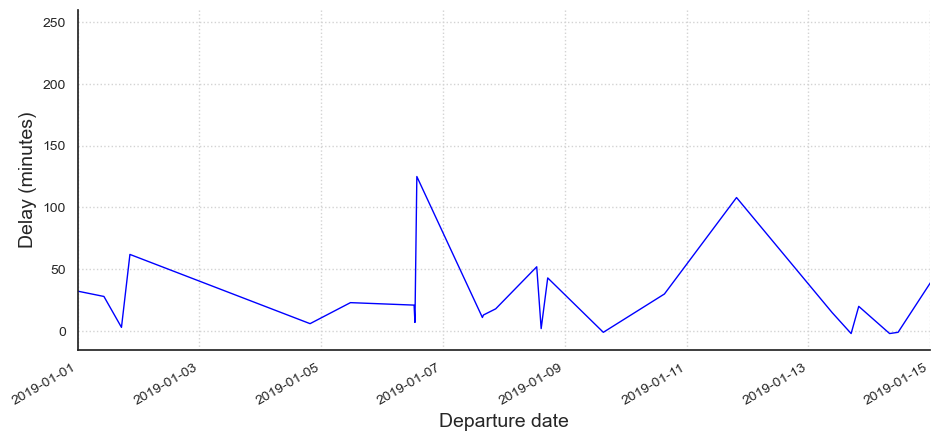

In [261]:
fig1 = Figure_style(11, 5, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_plot(df2['crs_dep_time'], df2['dep_delay'], linestyle='-')
fig1.style() 
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure date', fontsize = 14)
date_1 = datetime.datetime(2019,1,1)
date_2 = datetime.datetime(2019,1,15)
fig1.set_xlim(date_1, date_2)
fig1.set_ylim(-15, 260)

In [297]:
#ignore all of this, done in tableau

In [61]:
miniflights['fl_date']
miniflights['fl_date'] = pd.to_datetime(miniflights['fl_date'])

In [64]:
miniflights.groupby(miniflights['fl_date'].dt.strftime('%B'))['dep_delay'].max().sort_values(ascending=False)

fl_date
February     1741.0
May          1690.0
September    1584.0
July         1492.0
January      1443.0
March        1392.0
October      1335.0
November     1318.0
April        1310.0
June         1287.0
December     1267.0
August       1203.0
Name: dep_delay, dtype: float64

In [65]:
miniflights.groupby(miniflights['fl_date'].dt.strftime('%B'))['dep_delay'].min().sort_values(ascending=False)

fl_date
June         -31.0
February     -34.0
October      -35.0
May          -35.0
March        -37.0
July         -37.0
April        -37.0
November     -39.0
December     -39.0
September    -40.0
August       -57.0
January     -194.0
Name: dep_delay, dtype: float64

In [66]:
miniflights.groupby(miniflights['fl_date'].dt.strftime('%B'))['dep_delay'].median().sort_values(ascending=False)

fl_date
June        -1.0
May         -2.0
March       -2.0
July        -2.0
February    -2.0
December    -2.0
August      -2.0
September   -3.0
October     -3.0
November    -3.0
January     -3.0
April       -3.0
Name: dep_delay, dtype: float64

In [269]:
miniflights.columns



Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'dest_airport_id', 'dest',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance'],
      dtype='object')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [ ]:
#for this question we need to pull back in the full csv without rows deleted so that we have weather delays only

In [298]:
flights=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/flights.csv')

In [299]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [490]:
weatherdf=flights[flights.weather_delay>0]

In [491]:
weatherdf

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
53,2018-06-11,UA,UA_CODESHARE,UA,6011,YV,N518LR,6011,11057,CLT,...,322,0.0,50.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
79,2018-06-11,UA,UA_CODESHARE,UA,6027,YV,N89304,6027,10397,ATL,...,689,0.0,34.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
132,2018-06-11,UA,UA_CODESHARE,UA,6065,YV,N88332,6065,11057,CLT,...,912,0.0,66.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
223,2018-06-11,UA,UA_CODESHARE,UA,6190,YV,N87337,6190,13487,MSP,...,1034,0.0,18.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
395,2018-06-11,F9,F9,F9,1433,F9,N311FR,1433,13204,MCO,...,1069,0.0,6.0,33.0,0.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15927305,2018-06-11,AA,AA,AA,2808,AA,N776AN,2808,13303,MIA,...,1121,0.0,111.0,0.0,0.0,97.0,NaN,NaN,NaN,NaN
15927353,2018-06-11,AA,AA_CODESHARE,AA,4958,PT,N333EN,4958,11057,CLT,...,155,0.0,19.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN
15927356,2018-06-11,AA,AA_CODESHARE,AA,4960,PT,N330EN,4960,11617,EWN,...,221,0.0,3.0,0.0,0.0,19.0,NaN,NaN,NaN,NaN
15927360,2018-06-11,AA,AA_CODESHARE,AA,4962,PT,N638AE,4962,14100,PHL,...,520,0.0,1.0,12.0,0.0,97.0,NaN,NaN,NaN,NaN


In [492]:
weatherdf.fl_date = pd.to_datetime(weatherdf.fl_date)

In [493]:
weatherdf['fl_date'] = pd.to_datetime(weatherdf['fl_date'])

In [494]:
weatherdepdelaydf=weatherdf.groupby(weatherdf['fl_date'].dt.strftime('%B'))['dep_delay'].sum().sort_values(ascending=False)

In [495]:
weatherarrdelaydf=weatherdf.groupby(weatherdf['fl_date'].dt.strftime('%B'))['arr_delay'].sum().sort_values(ascending=False)

In [496]:
monthly_arrival_delays=pd.DataFrame(weatherarrdelaydf)

In [497]:
monthly_departure_delays=pd.DataFrame(weatherdepdelaydf)

In [498]:
#convert to csv to graph on tableau 

In [499]:
#find the max delay time every month and extract weather for that day to see how different weather patters effect 
#delay times 

In [560]:
weatherdf.groupby(weatherdf['fl_date'].dt.strftime('%B, %Y'))['arr_delay'].max().sort_values(ascending=False)

fl_date
March, 2019        2923.0
July, 2018         2692.0
February, 2018     2475.0
December, 2018     2108.0
April, 2019        2075.0
December, 2019     1847.0
January, 2018      1717.0
January, 2019      1609.0
October, 2019      1608.0
September, 2019    1585.0
November, 2019     1575.0
February, 2019     1521.0
September, 2018    1483.0
August, 2019       1459.0
March, 2018        1435.0
June, 2019         1431.0
July, 2019         1418.0
June, 2018         1417.0
November, 2018     1397.0
April, 2018        1387.0
October, 2018      1370.0
May, 2018          1332.0
May, 2019          1299.0
August, 2018       1193.0
Name: arr_delay, dtype: float64

In [501]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [502]:
cols=['fl_date','origin','weather_delay','dest','dep_delay','arr_delay']

In [503]:
j=weatherdf[cols]

In [504]:
j=j.rename(columns={"origin": "IATA_CODE"})

In [505]:
result = pd.merge(j,
                 airports[['IATA_CODE', 'LATITUDE','LONGITUDE']],
                 on='IATA_CODE')
result.head()

,fl_date,IATA_CODE,weather_delay,dest,dep_delay,arr_delay,LATITUDE,LONGITUDE
0,2018-06-11,CLT,50.0,IAD,58.0,50.0,35.21401,-80.94313
1,2018-06-11,CLT,66.0,IAH,54.0,66.0,35.21401,-80.94313
2,2018-06-11,CLT,19.0,GSO,19.0,22.0,35.21401,-80.94313
3,2018-06-11,CLT,21.0,CMH,40.0,32.0,35.21401,-80.94313
4,2018-06-11,CLT,122.0,ATL,122.0,129.0,35.21401,-80.94313


In [506]:
result=result.rename(columns={"IATA_CODE": "departure airport",'dest':'IATA_CODE','LATITUDE':'departure latitude','LONGITUDE':'departure longitude'})

In [507]:
result

,fl_date,departure airport,weather_delay,IATA_CODE,dep_delay,arr_delay,departure latitude,departure longitude
0,2018-06-11,CLT,50.0,IAD,58.0,50.0,35.21401,-80.94313
1,2018-06-11,CLT,66.0,IAH,54.0,66.0,35.21401,-80.94313
2,2018-06-11,CLT,19.0,GSO,19.0,22.0,35.21401,-80.94313
3,2018-06-11,CLT,21.0,CMH,40.0,32.0,35.21401,-80.94313
4,2018-06-11,CLT,122.0,ATL,122.0,129.0,35.21401,-80.94313
...,...,...,...,...,...,...,...,...
179521,2019-07-30,STX,2.0,MIA,74.0,93.0,17.70189,-64.79856
179522,2018-08-30,STX,22.0,MIA,34.0,23.0,17.70189,-64.79856
179523,2018-08-30,STX,47.0,SJU,143.0,142.0,17.70189,-64.79856
179524,2018-11-13,STX,21.0,SJU,24.0,29.0,17.70189,-64.79856


In [508]:
result = pd.merge(result,
                 airports[['IATA_CODE', 'LATITUDE','LONGITUDE']],
                 on='IATA_CODE')
result.head()

,fl_date,departure airport,weather_delay,IATA_CODE,dep_delay,arr_delay,departure latitude,departure longitude,LATITUDE,LONGITUDE
0,2018-06-11,CLT,50.0,IAD,58.0,50.0,35.21401,-80.94313,38.94453,-77.45581
1,2018-06-11,CLT,33.0,IAD,48.0,63.0,35.21401,-80.94313,38.94453,-77.45581
2,2018-06-19,CLT,75.0,IAD,75.0,81.0,35.21401,-80.94313,38.94453,-77.45581
3,2018-06-22,CLT,24.0,IAD,16.0,24.0,35.21401,-80.94313,38.94453,-77.45581
4,2018-06-26,CLT,57.0,IAD,60.0,57.0,35.21401,-80.94313,38.94453,-77.45581


In [509]:
result=result.rename(columns={"IATA_CODE": "dest airport",'LATITUDE':'dest latitude','LONGITUDE':'dest longitude'})

In [510]:
result

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude
0,2018-06-11,CLT,50.0,IAD,58.0,50.0,35.21401,-80.94313,38.94453,-77.45581
1,2018-06-11,CLT,33.0,IAD,48.0,63.0,35.21401,-80.94313,38.94453,-77.45581
2,2018-06-19,CLT,75.0,IAD,75.0,81.0,35.21401,-80.94313,38.94453,-77.45581
3,2018-06-22,CLT,24.0,IAD,16.0,24.0,35.21401,-80.94313,38.94453,-77.45581
4,2018-06-26,CLT,57.0,IAD,60.0,57.0,35.21401,-80.94313,38.94453,-77.45581
...,...,...,...,...,...,...,...,...,...,...
177336,2019-07-24,SCC,31.0,BRW,31.0,37.0,70.19476,-148.46516,71.28545,-156.76600
177337,2018-01-19,SCC,12.0,BRW,92.0,87.0,70.19476,-148.46516,71.28545,-156.76600
177338,2018-03-01,SCC,60.0,BRW,66.0,60.0,70.19476,-148.46516,71.28545,-156.76600
177339,2019-02-23,SCC,23.0,BRW,26.0,23.0,70.19476,-148.46516,71.28545,-156.76600


In [511]:
result=result.sort_values('weather_delay', ascending=False)

In [512]:
result['weather_delay'].describe()

count    177341.000000
mean         60.724863
std         112.328790
min           1.000000
25%          11.000000
50%          26.000000
75%          64.000000
max        2900.000000
Name: weather_delay, dtype: float64

In [636]:
result['weather_delay'].median()

22.0

In [513]:
wetdelay = result['weather_delay'].values
q25, q75 = np.nanpercentile(wetdelay, 25), np.nanpercentile(wetdelay, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
wetdelay_iqr = q75 - q25
print('iqr: {}'.format(wetdelay_iqr))

wetdelay_cut_off = wetdelay_iqr * 1.5
wetdelay_lower, wetdelay_upper = q25 - wetdelay_cut_off, q75 + wetdelay_cut_off
print('Cut Off: {}'.format(wetdelay_cut_off))
print('V14 Lower: {}'.format(wetdelay_lower))
print('V14 Upper: {}'.format(wetdelay_upper))

outliers = [x for x in wetdelay if x < wetdelay_lower or x > wetdelay_upper]
print('Feature delayed Outliers : {}'.format(len(outliers)))
print('delayed outliers:{}'.format(outliers))

result = result.drop(result[(result['weather_delay'] > wetdelay_upper) | (result['weather_delay'] < wetdelay_lower)].index)
print('----' * 44)

Quartile 25: 11.0 | Quartile 75: 64.0
iqr: 53.0
Cut Off: 79.5
V14 Lower: -68.5
V14 Upper: 143.5
Feature delayed Outliers : 16716
delayed outliers:[2900.0, 2692.0, 2475.0, 2098.0, 1847.0, 1682.0, 1575.0, 1570.0, 1552.0, 1550.0, 1521.0, 1486.0, 1466.0, 1460.0, 1440.0, 1438.0, 1431.0, 1422.0, 1416.0, 1410.0, 1398.0, 1395.0, 1392.0, 1390.0, 1389.0, 1388.0, 1385.0, 1382.0, 1352.0, 1352.0, 1347.0, 1338.0, 1335.0, 1332.0, 1332.0, 1331.0, 1328.0, 1325.0, 1322.0, 1322.0, 1320.0, 1319.0, 1316.0, 1308.0, 1306.0, 1302.0, 1299.0, 1293.0, 1292.0, 1287.0, 1287.0, 1280.0, 1277.0, 1273.0, 1270.0, 1268.0, 1265.0, 1264.0, 1261.0, 1259.0, 1258.0, 1256.0, 1254.0, 1252.0, 1244.0, 1241.0, 1239.0, 1237.0, 1237.0, 1236.0, 1236.0, 1234.0, 1227.0, 1226.0, 1224.0, 1223.0, 1223.0, 1214.0, 1213.0, 1211.0, 1210.0, 1209.0, 1206.0, 1204.0, 1203.0, 1203.0, 1203.0, 1203.0, 1199.0, 1198.0, 1198.0, 1198.0, 1196.0, 1196.0, 1196.0, 1196.0, 1194.0, 1194.0, 1194.0, 1194.0, 1193.0, 1189.0, 1187.0, 1187.0, 1186.0, 1186.0, 1184.

In [556]:
result.dtypes

fl_date                datetime64[ns]
departure airport              object
weather_delay                 float64
dest airport                   object
dep_delay                     float64
arr_delay                     float64
departure latitude            float64
departure longitude           float64
dest latitude                 float64
dest longitude                float64
dtype: object

In [564]:
result

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude
86624,2019-11-20,BOS,143.0,LAS,166.0,143.0,42.36435,-71.00518,36.08036,-115.15233
3473,2019-02-28,BHM,143.0,IAH,150.0,143.0,33.56294,-86.75355,29.98047,-95.33972
111256,2018-10-05,ORD,143.0,DFW,143.0,147.0,41.97960,-87.90446,32.89595,-97.03720
63594,2018-06-11,PBI,143.0,LGA,150.0,143.0,26.68316,-80.09559,40.77724,-73.87261
95949,2019-02-24,IAD,143.0,DTW,105.0,143.0,38.94453,-77.45581,42.21206,-83.34884
...,...,...,...,...,...,...,...,...,...,...
11527,2018-05-25,MGM,1.0,ATL,50.0,37.0,32.30064,-86.39398,33.64044,-84.42694
32378,2018-11-16,ERI,1.0,ORD,31.0,34.0,42.08202,-80.17622,41.97960,-87.90446
92558,2018-02-09,DTW,1.0,EWR,1.0,35.0,42.21206,-83.34884,40.69250,-74.16866
172446,2018-01-12,HNL,1.0,KOA,22.0,23.0,21.31869,-157.92241,19.73877,-156.04563


In [565]:
result.sort_values('fl_date')

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude
156564,2018-01-01,BOS,32.0,CLT,225.0,211.0,42.36435,-71.00518,35.21401,-80.94313
39967,2018-01-01,ATL,86.0,PIT,86.0,121.0,33.64044,-84.42694,40.49147,-80.23287
117969,2018-01-01,GCK,3.0,DFW,3.0,21.0,37.92752,-100.72441,32.89595,-97.03720
93781,2018-01-01,ORD,69.0,CHS,88.0,69.0,41.97960,-87.90446,32.89865,-80.04051
41773,2018-01-01,ORD,6.0,MSY,19.0,21.0,41.97960,-87.90446,29.99339,-90.25803
...,...,...,...,...,...,...,...,...,...,...
162463,2019-12-31,ORD,12.0,RST,39.0,15.0,41.97960,-87.90446,43.90883,-92.49799
38858,2019-12-31,TWF,36.0,LAX,48.0,36.0,42.48180,-114.48774,33.94254,-118.40807
77552,2019-12-31,ORD,30.0,PHX,72.0,77.0,41.97960,-87.90446,33.43417,-112.00806
108349,2019-12-31,ORD,100.0,TYS,293.0,286.0,41.97960,-87.90446,35.81249,-83.99286


In [569]:
if result['fl_date'].dt.strftime('%B')=='01':
    


86624     False
3473      False
111256    False
63594     False
95949     False
          ...  
11527     False
32378     False
92558     False
172446    False
122376    False
Name: fl_date, Length: 160625, dtype: bool

In [579]:
janmarch2018=result[result.fl_date.between(datetime.datetime(2018,1,1), datetime.datetime(2018,3,31))]
janmarch2019=result[result.fl_date.between(datetime.datetime(2019,1,1), datetime.datetime(2019,3,31))]
apjun2018=result[result.fl_date.between(datetime.datetime(2018,4,1), datetime.datetime(2018,6,30))]
apjun2019=result[result.fl_date.between(datetime.datetime(2019,4,1), datetime.datetime(2019,6,30))]
julsep2018=result[result.fl_date.between(datetime.datetime(2018,7,1), datetime.datetime(2018,9,30))]
julsep2019=result[result.fl_date.between(datetime.datetime(2019,7,1), datetime.datetime(2019,9,30))]
octdec2018=result[result.fl_date.between(datetime.datetime(2018,10,1), datetime.datetime(2018,12,31))]
octdec2019=result[result.fl_date.between(datetime.datetime(2019,10,1), datetime.datetime(2019,12,31))]

In [600]:
df=janmarch2018.sample(n=400)

In [626]:
s1=janmarch2018.sample(n=60,random_state=1)
s2=janmarch2019.sample(n=60,random_state=1)
s3=apjun2018.sample(n=60,random_state=1)
s4=apjun2019.sample(n=60,random_state=1)
s5=julsep2018.sample(n=60,random_state=1)
s6=julsep2019.sample(n=60,random_state=1)
s7=octdec2018.sample(n=60,random_state=1)
s8=octdec2019.sample(n=60,random_state=1)

In [627]:
df=s1.append([s2,s3,s4,s5,s6,s7,s8])


In [628]:
df

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude
44284,2018-03-13,MDW,27.0,STL,54.0,41.0,41.78598,-87.75242,38.74769,-90.35999
12122,2018-03-09,ORD,33.0,ATL,46.0,33.0,41.97960,-87.90446,33.64044,-84.42694
165909,2018-01-17,IAH,71.0,HNL,94.0,71.0,29.98047,-95.33972,21.31869,-157.92241
19719,2018-02-07,ATL,16.0,CVG,55.0,39.0,33.64044,-84.42694,39.04614,-84.66217
80472,2018-01-18,OAK,32.0,SAN,35.0,32.0,37.72129,-122.22072,32.73356,-117.18966
...,...,...,...,...,...,...,...,...,...,...
18637,2019-12-19,EWR,18.0,BTV,18.0,66.0,40.69250,-74.16866,44.47300,-73.15031
27171,2019-12-02,LGA,19.0,ORD,47.0,60.0,40.77724,-73.87261,41.97960,-87.90446
151689,2019-11-13,MEM,52.0,HOU,58.0,52.0,35.04242,-89.97667,29.64542,-95.27889
84541,2019-12-19,EWR,6.0,SEA,42.0,45.0,40.69250,-74.16866,47.44898,-122.30931


In [629]:
df['fl_date']=(df['fl_date']-pd.Timestamp("1970-01-01"))//pd.Timedelta('1s')

In [630]:
def get_weather(row):
    time.sleep(3)
    response=re.get(f'https://api.darksky.net/forecast/{darksky_key}/{row["departure latitude"]},{row["departure longitude"]},{row["fl_date"]}').json()
    try:
        return response['currently']['icon']
    except:
        return 'cloudy'

In [631]:
df['weather']=df.apply(lambda row:get_weather(row),axis=1)

In [632]:
df

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude,weather
44284,1520899200,MDW,27.0,STL,54.0,41.0,41.78598,-87.75242,38.74769,-90.35999,cloudy
12122,1520553600,ORD,33.0,ATL,46.0,33.0,41.97960,-87.90446,33.64044,-84.42694,partly-cloudy-night
165909,1516147200,IAH,71.0,HNL,94.0,71.0,29.98047,-95.33972,21.31869,-157.92241,cloudy
19719,1517961600,ATL,16.0,CVG,55.0,39.0,33.64044,-84.42694,39.04614,-84.66217,partly-cloudy-night
80472,1516233600,OAK,32.0,SAN,35.0,32.0,37.72129,-122.22072,32.73356,-117.18966,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...
18637,1576713600,EWR,18.0,BTV,18.0,66.0,40.69250,-74.16866,44.47300,-73.15031,partly-cloudy-night
27171,1575244800,LGA,19.0,ORD,47.0,60.0,40.77724,-73.87261,41.97960,-87.90446,rain
151689,1573603200,MEM,52.0,HOU,58.0,52.0,35.04242,-89.97667,29.64542,-95.27889,clear-night
84541,1576713600,EWR,6.0,SEA,42.0,45.0,40.69250,-74.16866,47.44898,-122.30931,partly-cloudy-night


In [654]:
df.to_csv(path_or_buf='/Users/jacklobe/lighthouse/w5/midterm/flights/weatherdelays.csv')

In [633]:
df['weather'].value_counts()

partly-cloudy-day      128
cloudy                 114
rain                    67
partly-cloudy-night     57
clear-night             53
clear-day               41
snow                    13
fog                      6
wind                     1
Name: weather, dtype: int64

In [659]:
dffog=df[['weather', 'weather_delay']]

In [677]:
dffog = df[(df['weather']=='fog')]
dfsnow=df[(df['weather']=='snow')]
dfrain=df[(df['weather']=='rain')]
dfwind=df[(df['weather']=='wind')]
dfclearnight=df[(df['weather']=='clear-day')]

In [665]:
dffog

,fl_date,departure airport,weather_delay,dest airport,dep_delay,arr_delay,departure latitude,departure longitude,dest latitude,dest longitude,weather
172357,1519430400,DFW,75.0,KOA,75.0,76.0,32.89595,-97.03720,19.73877,-156.04563,fog
58799,1515369600,SLC,103.0,SFO,120.0,103.0,40.78839,-111.97777,37.61900,-122.37484,fog
40465,1515974400,ORD,28.0,PIT,28.0,46.0,41.97960,-87.90446,40.49147,-80.23287,fog
36470,1515974400,ORD,18.0,LAX,18.0,22.0,41.97960,-87.90446,33.94254,-118.40807,fog
23600,1518220800,DEN,30.0,ORD,30.0,75.0,39.85841,-104.66700,41.97960,-87.90446,fog
143282,1537920000,ALB,45.0,PHL,48.0,45.0,42.74812,-73.80298,39.87195,-75.24114,fog


Text(0.5, 0, 'Fog Delays (minutes)')

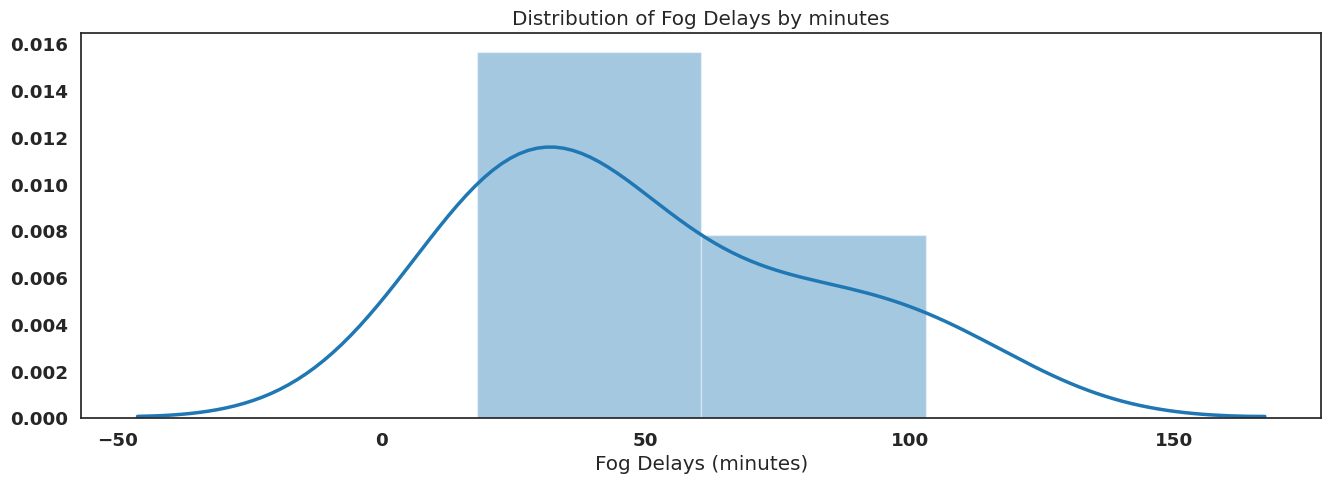

In [668]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(dffog.weather_delay, ax=ax)
plt.title('Distribution of Fog Delays by minutes')
plt.xlabel('Fog Delays (minutes)')

Text(0.5, 0, 'Wind Delays (minutes)')

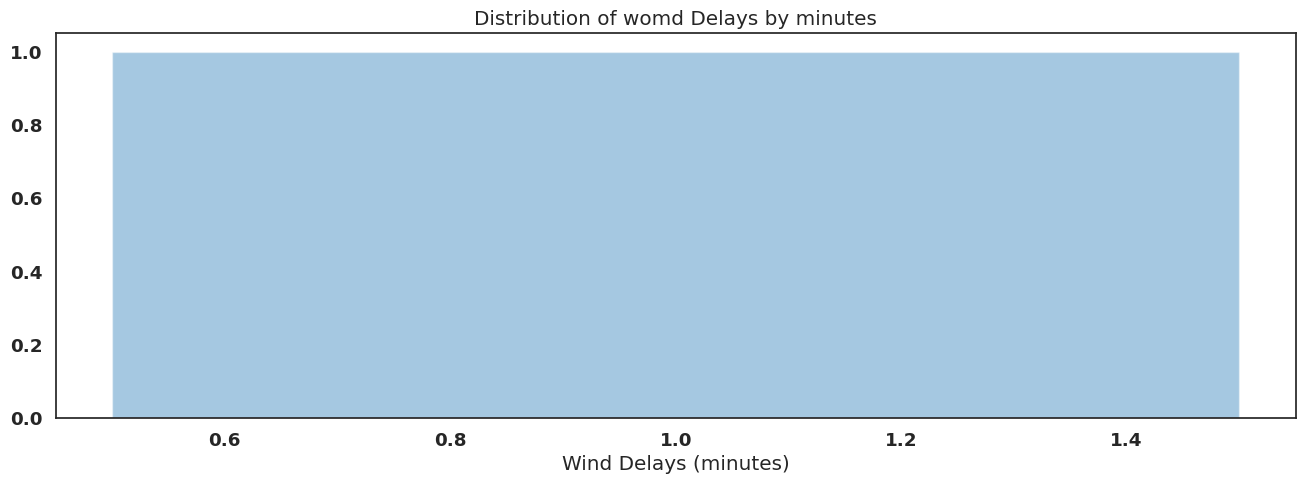

In [678]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(dfwind.weather_delay, ax=ax)
plt.title('Distribution of womd Delays by minutes')
plt.xlabel('Wind Delays (minutes)')

Text(0.5, 0, 'Rain Delays (minutes)')

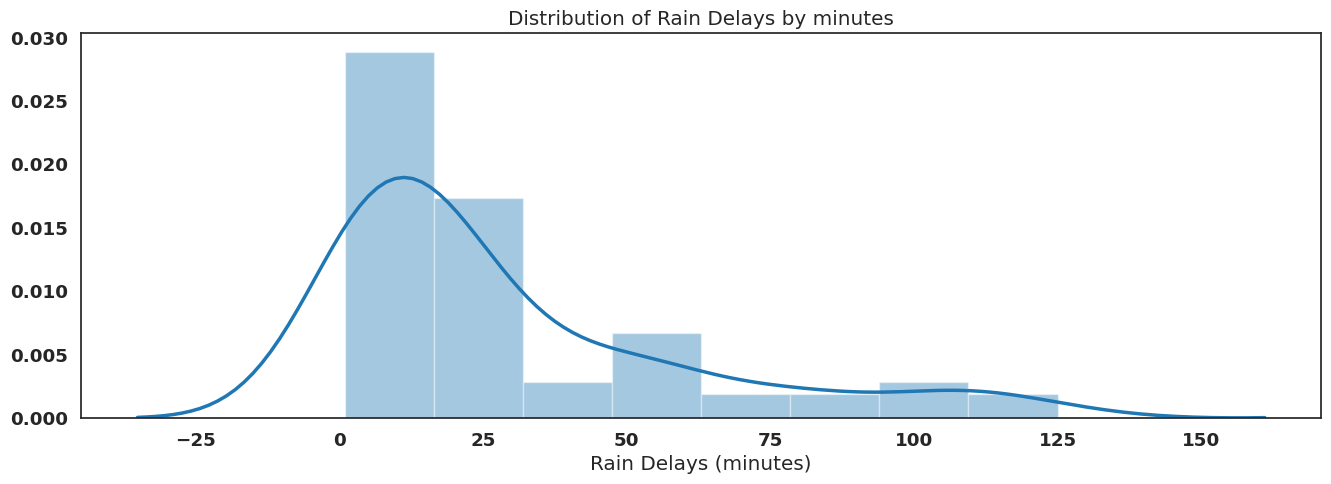

In [679]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(dfrain.weather_delay, ax=ax)
plt.title('Distribution of Rain Delays by minutes')
plt.xlabel('Rain Delays (minutes)')

Text(0.5, 0, 'Snow Delays (minutes)')

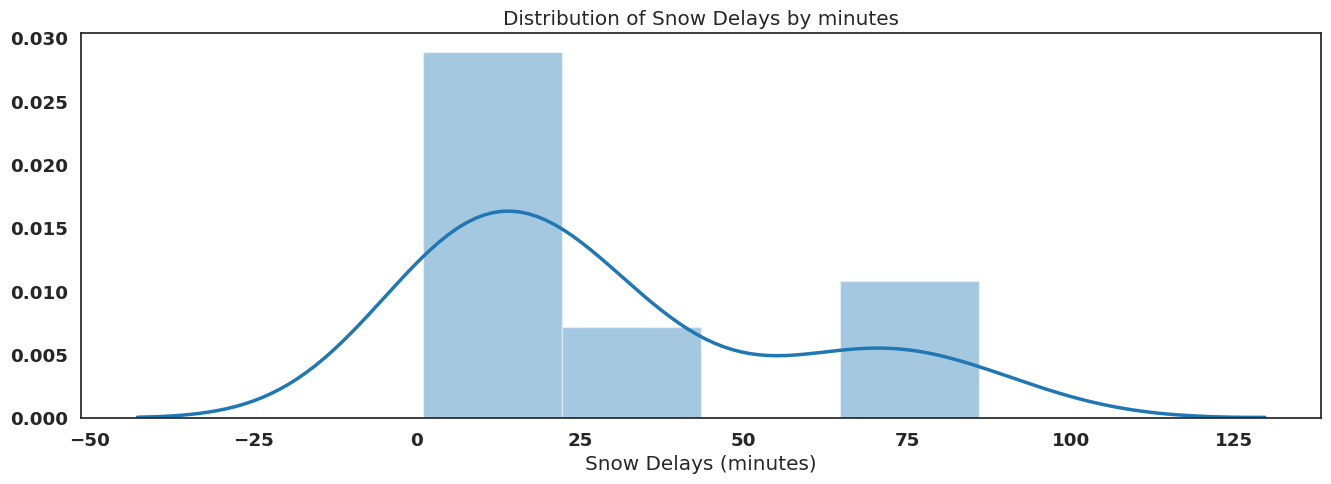

In [680]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(dfsnow.weather_delay, ax=ax)
plt.title('Distribution of Snow Delays by minutes')
plt.xlabel('Snow Delays (minutes)')

Text(0.5, 0, 'Clear days Delays (minutes)')

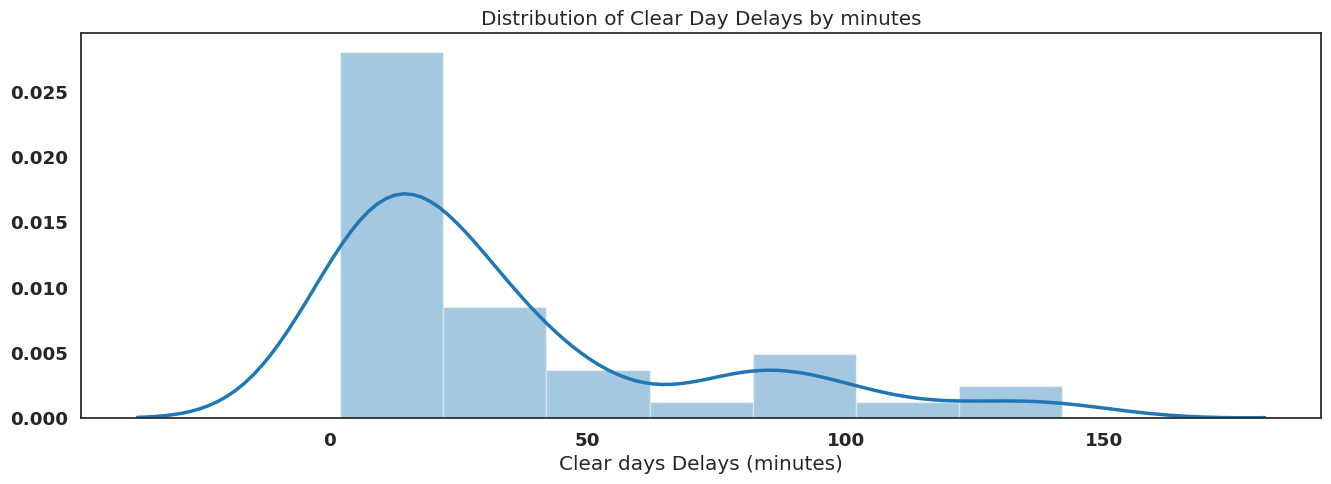

In [681]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.distplot(dfclearday.weather_delay, ax=ax)
plt.title('Distribution of Clear Day Delays by minutes')
plt.xlabel('Clear days Delays (minutes)')

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [401]:
miniflights.head(5)

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,...,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-01-20,WN,4358,WN,N8716B,4358,15016,STL,14122,PIT,...,1727.0,1940.0,6.0,1940,1946.0,6.0,90.0,92.0,73.0,554
1,2019-10-17,DL,1211,DL,N380DN,1211,14107,PHX,13487,MSP,...,1710.0,2134.0,4.0,2155,2138.0,-17.0,173.0,161.0,144.0,1276
2,2018-03-26,UA,3890,ZW,N434AW,3890,13930,ORD,10408,ATW,...,1317.0,1344.0,29.0,1417,1413.0,-4.0,67.0,72.0,27.0,160
3,2018-09-25,WN,1017,WN,N7862A,1017,14100,PHL,13232,MDW,...,1741.0,1858.0,4.0,1805,1902.0,57.0,130.0,172.0,137.0,668
4,2019-07-04,AA,5194,OH,N598NN,5194,14100,PHL,13577,MYR,...,1745.0,1903.0,9.0,1722,1912.0,110.0,105.0,207.0,78.0,473


In [402]:
taxitime=miniflights[['dep_time','taxi_out','arr_time','taxi_in']]

<AxesSubplot:xlabel='arr_time', ylabel='taxi_in'>

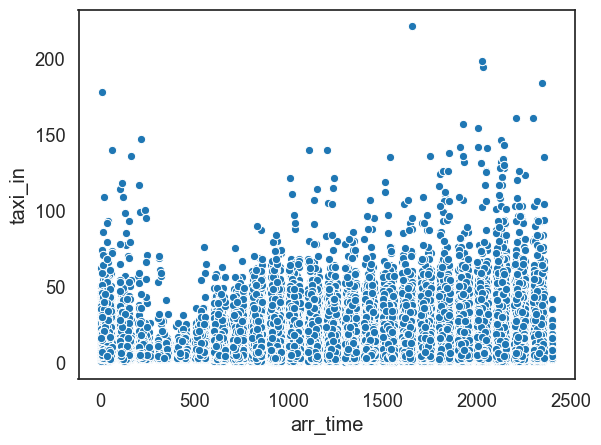

In [403]:
taxitime
sns.scatterplot(taxitime.arr_time,taxitime.taxi_in)

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

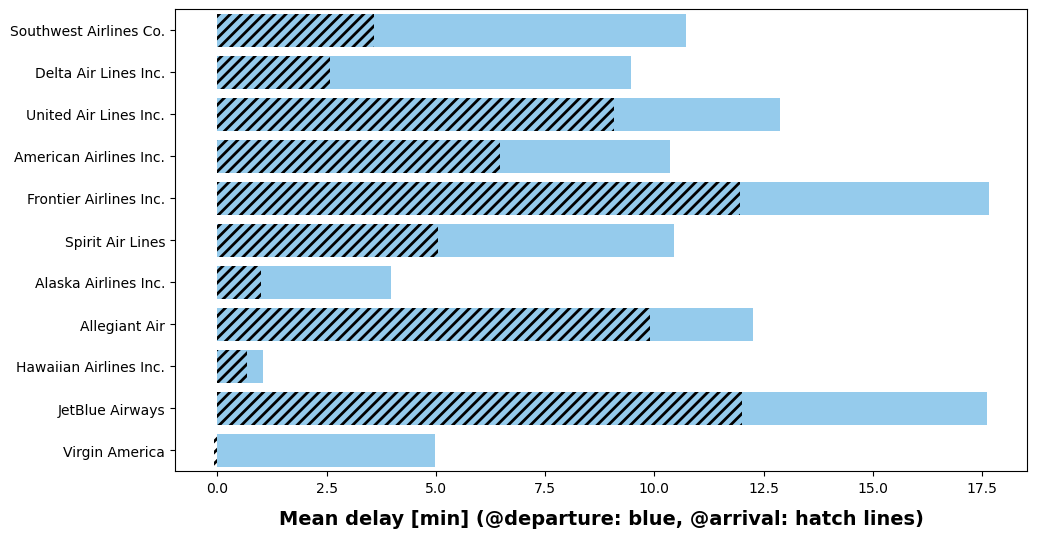

In [195]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="dep_delay", y="mkt_unique_carrier", data=miniflights, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="mkt_unique_carrier", data=miniflights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);
